## Walmart Sales Analysis

### Data Cleaning · EDA · Feature Engineering · Modelo Base
### Este proyecto forma parte de mi portafolio, orientado a posiciones como: 

*Exploratory Data Analyst / Data Cleaning / Data Scientist Entry*

Este notebook realiza: 

* Limpieza completa del dataset
* Análisis exploratorio (EDA)
* Creación de nuevas variables
* Análisis temporal
* Impacto de días festivos
* Correlaciones preliminares y otras avanzadas
* Conclusiones de negocio

**Objetivo**

Demostrar habilidades prácticas en manejo de datos, análisis estructurado, visualización y preparación de datasets para modelado, utilizando un caso de ventas reales.

## Sección 1. Carga y descripción de DataSet 

    1.1 Librerías:
    - pandas 
    - numpy
    - seaborn
    - scikit-learn
    
    1.2 Carga del DataSet: Walmart provee tres archivos distintos: 
     - features variables económicas y markdowns 
     - stores información de 45 tiendas, tamaño y tipo 
     - train ventas semanales por tienda y departamento 
     Los tres se integran en un solo DataFrame para el trabajo de limpieza

    1.3 Verificación de columnas (Datos generales)
     - Número de filas y columnas 
     - Tipos de datos
     - Duplicados 
     - Valores nulos

In [1]:
#1.1 Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Carga de datos
features=pd.read_csv("C:/Users/andre/OneDrive/MachineLearning_Portfolio_Andrea/02_Walmart_Data_Cleaning/Data/data_raw/Features_data_set.csv")
stores=pd.read_csv("C:/Users/andre/OneDrive/MachineLearning_Portfolio_Andrea/02_Walmart_Data_Cleaning/Data/data_raw/stores_data_set.csv")
sales=pd.read_csv("C:/Users/andre/OneDrive/MachineLearning_Portfolio_Andrea/02_Walmart_Data_Cleaning/Data/data_raw/sales_data_set.csv")

#Visualización general
features.head(), 
stores.head(), 
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [3]:
#descripción de cada set de datos 
stores.shape, 
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
features.shape, 
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
sales.shape, 
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Sección 2. Limpieza de Datos

    2.1 Unificar DataSet
      - Se unifican los tres archivos en uno.
      - Nombre: full_df
    2.2 Conversión de tipos de Datos
     - Cambiar el formato de fecha
    2.3 Revisión de valores nulos
      - columnas con 0% de valores nulos → se usan directamente
      - columnas con nulos moderados → se puede imputar
      - columnas con demasiados nulos → evaluar si deben eliminarse
      En este proyecto, los valores nulos pertenecen a las columnas de markdowns.
    2.4 Duplicados
      - Verificación de columnas duplicadas en el DataSet
    2.5 Detección exploratoria de Outliers
      - Solo se observa de dónde podrían provenir, estos no se eliminan. 
    2.6 Estado del DataSet posterior a la limpieza
    - Dimensiones
    - tipo de datos
    - porcentaje de nulos 
    - primeras filas

In [6]:
#Conversión de fechas a datetime
features["Date"]=pd.to_datetime(features["Date"],dayfirst=True)
sales['Date']=pd.to_datetime(sales['Date'],dayfirst=True)

In [7]:
#Conversión de datos a int
stores["Store"] = stores["Store"].astype(int)

In [8]:
#unificar bases de datos por pasos
#Unir sales y features 
sales_features=pd.merge(
    sales,
    features,
    on=['Store','Date'],
    how='left'
)

In [9]:
sales_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
dtypes: bool(2), datet

In [10]:
# unir sales+features+stores
full_df=pd.merge(
    sales_features,
    stores,
    on='Store',
    how='left'
)

In [11]:
full_df.info(), 
full_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [12]:
#hay dos variables IsHoliday, que son iguales, asi que se comparan para verificar si hay discrepancias 
(full_df["IsHoliday_x"] != full_df["IsHoliday_y"]).sum()

np.int64(0)

In [13]:
#Se elimina una columna IsHoliday, porque está duplicada
full_df = full_df.drop(columns=["IsHoliday_y"])
full_df = full_df.rename(columns={"IsHoliday_x": "IsHoliday"})

In [14]:
# Faltantes o NA (investigación preliminar) 
full_df.isnull().sum().sort_values(ascending=False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Store                0
Date                 0
Dept                 0
Fuel_Price           0
Temperature          0
IsHoliday            0
Weekly_Sales         0
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [15]:
#rellenar columnas nan con ceros
#Los Markdowns constituyen rebajas, los que tienen NAN son los días donde no se aplicó rebajas, se puede colocar cero
columnas=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
full_df[columnas]=full_df[columnas].fillna(0)

In [16]:
full_df.isnull().sum().sort_values(ascending=False)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [17]:
full_df.duplicated().sum()

np.int64(0)

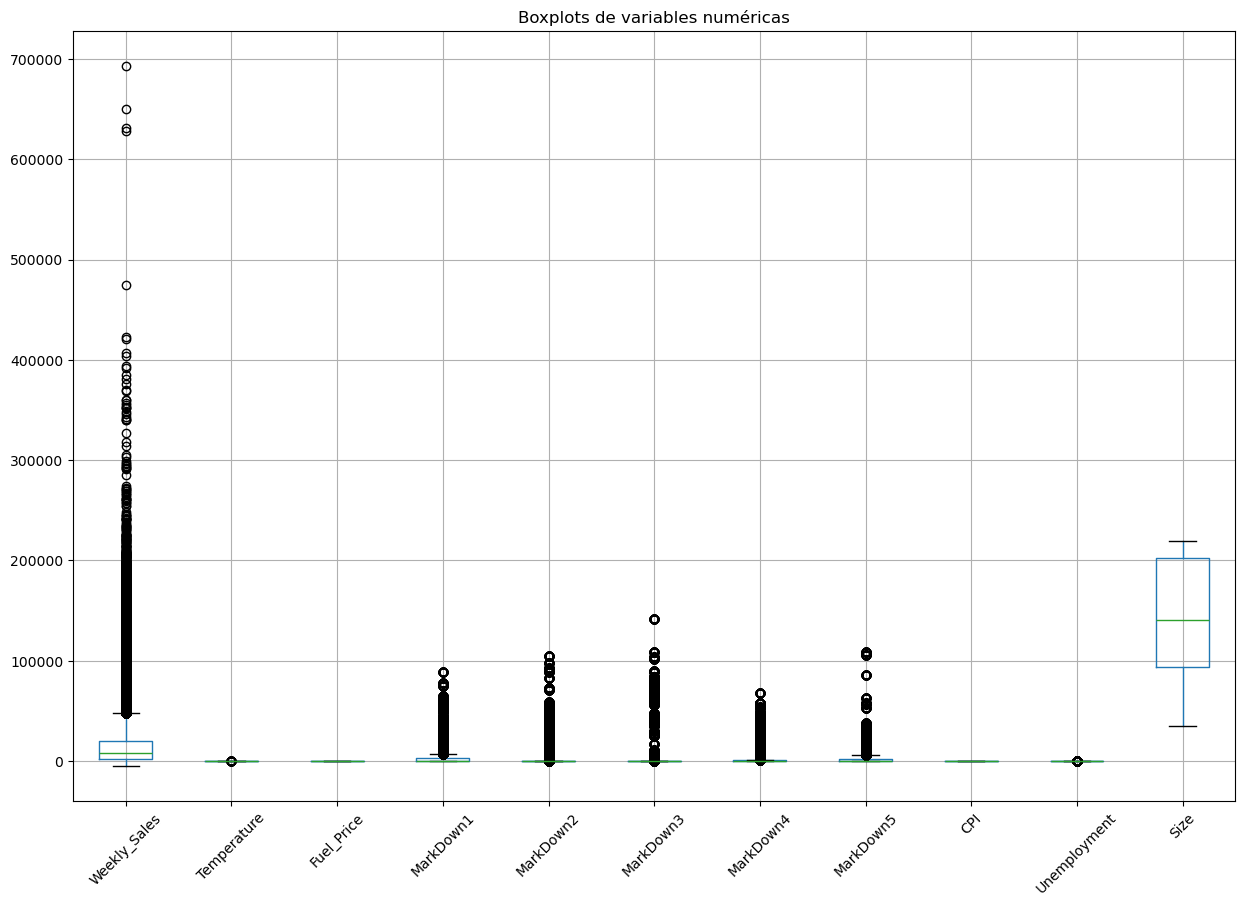

In [18]:
# revisar los outliers para columnas numéricas
columnas_numericas=['Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']

plt.figure(figsize=(15,10))

full_df[columnas_numericas].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()

In [19]:
full_df.describe(include="number")

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [20]:
full_df.info()
full_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

(421570, 16)

## Sección 3.  Feature Engineering Inicial( Creación de nuevas variables)

En esta sección se crean variables nuevas que permitirán desarrollar anñalisis temporales básicos en fases posteriores. 

    3.1 Creación de variables temporales 
    - Año
    - Mes 
    - Semana del año 
    - Día (1 al 31)
    3.2 Creación de variable Holiday Type Cat
    - Busca distingir el tipo de festividad en: 
    - SuperBowl, LaborDay, Acción de gracias, navidad, blackfriday
    3.3 Categorización de variables (OneHotEncoding)
    - Conversión de variables dummies
    - Type, Holiday_type_cat

In [21]:
# Nuevas features temporales (GENERALES)
full_df["Year"] = full_df["Date"].dt.year
full_df["Month"] = full_df["Date"].dt.month
full_df["Week"] = full_df["Date"].dt.isocalendar().week.astype(int)
full_df["Day"] = full_df["Date"].dt.day
full_df["DayOfYear"] = full_df["Date"].dt.dayofyear
full_df["Quarter"] = full_df["Date"].dt.quarter

# Flags útiles
full_df["IsMonthEnd"] = full_df["Date"].dt.is_month_end
full_df["IsMonthStart"] = full_df["Date"].dt.is_month_start

# Verificación rápida
full_df[["Date","Year","Month","Week","Quarter","IsMonthEnd", "IsMonthStart"]].head()


,Date,Year,Month,Week,Quarter,IsMonthEnd,IsMonthStart
0,2010-02-05,2010,2,5,1,False,False
1,2010-02-12,2010,2,6,1,False,False
2,2010-02-19,2010,2,7,1,False,False
3,2010-02-26,2010,2,8,1,False,False
4,2010-03-05,2010,3,9,1,False,False


In [22]:
# Crear lista de fechas especiales
holiday_dict = {
    "SuperBowl":      ["2010-02-12", "2011-02-11", "2012-02-10"],
    "LaborDay":       ["2010-09-10", "2011-09-09", "2012-09-07"],
    "Thanksgiving":   ["2010-11-26", "2011-11-25", "2012-11-23"],
    "Christmas":      ["2010-12-31", "2011-12-30", "2012-12-28"],
    "Easter":         ["2010-04-02", "2011-04-22", "2012-04-06"],
    "BlackFriday":    ["2010-11-26", "2011-11-25", "2012-11-23"]  #mismas fechas que día de acción de gracias
}

In [23]:
# Convertir A DICCIONARIO DE HOLIDAYS
holiday_map = {}
for holiday_name, date_list in holiday_dict.items():
    for d in date_list:
        holiday_map[pd.to_datetime(d)] = holiday_name

# Crear la variable categorica final
full_df["Holiday_Type"] = full_df["Date"].map(holiday_map).fillna("None")

# Verificación
full_df["Holiday_Type"].value_counts()

Holiday_Type
None           383022
SuperBowl        8895
Easter           8887
LaborDay         8861
BlackFriday      5959
Christmas        5946
Name: count, dtype: int64

In [25]:
# Crear variables dummy SIN eliminar la columna original
holiday_dummies = pd.get_dummies(full_df["Holiday_Type"], 
                                 prefix="Holiday",
                                 drop_first=False) # SE ELIMINARÁ DESPUÉS DEL EDA

# Concatenar las dummies al dataframe original
full_df = pd.concat([full_df, holiday_dummies], axis=1)

# Verificar
full_df.filter(like="Holiday_").head()

,Holiday_Type,Holiday_BlackFriday,Holiday_Christmas,Holiday_Easter,Holiday_LaborDay,Holiday_None,Holiday_SuperBowl
0,None,False,False,False,False,True,False
1,SuperBowl,False,False,False,False,False,True
2,None,False,False,False,False,True,False
3,None,False,False,False,False,True,False
4,None,False,False,False,False,True,False


In [26]:
# Crear dummies a partir de la columna Type (SIN borrarla)
type_dummies = pd.get_dummies(full_df["Type"],
                              prefix="Type",
                              drop_first=False)  # se eliminará después del EDA

# 3. Unirlas al dataframe original
full_df = pd.concat([full_df, type_dummies], axis=1)

# 4. Verificación
full_df.filter(like="Type").head()

,Type,Holiday_Type,Type_A,Type_B,Type_C
0,A,None,True,False,False
1,A,SuperBowl,True,False,False
2,A,None,True,False,False
3,A,None,True,False,False
4,A,None,True,False,False


In [27]:
full_df['Type'].isna().sum()

np.int64(0)

In [28]:
full_df["Type"].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

## Sección 4. Análisis exploratorio de datos 

En esta sección se analiza el comportamiento de las ventas, su distribución, la relación con variables numéricas, el impacto de días festivos y tiendas, así como patrones temporales.
En varios casos se debe gestinar variables que intervienen. 

    4.1 Distribución de variable objetivo
    - Weekly_sales
    - Presencia de valores extremos
    - Sesgo
    - Transformación
    - picos asociados a festividades
    4.2 Transformación logarítmica de variable objetivo 
    - Comparación con variable original 
    - conclusiones sobre la transformación.
    4.3 Análisis por tipo de tienda
    - variablidad
    - ventas por tipo
    4.4 Impacto de días festivos 
    - ventas en semanas festivas
    - ventas promedio 
    4.5 Impacto de festividades específicas
    - Agrupación por cada Holiday específico 
    - Ventas promedio
    - Variabilidad
    - Conclusiones
    4.6 Transforamciones MarkDown 
    - Codificar como dummie
    - Distibución
    - Correlaciones
    4.7 Correlaciones entre variables numericas 
    - Matriz de correlación numérica
    - HeatMap
    - Correlaciones contra variable objetivo 
    - Correlaciones con variable logarítmica 
    4.8 Análisis Temporal 
    - Ventas promedio por a{o 
    - Ventas promedio por mes 
    - Gráfico de tendencia actual 
    - Estacionalidad general 
    4.9 Conclusiones     

In [29]:
#Iniciamos con Weekly_Sales, por ser la variable objetivo
# Iniciamos con los datos absurdos, en este caso valores negativoa
((full_df['Weekly_Sales']<0).sum()/len(full_df))*100

np.float64(0.30481296107408024)

<function matplotlib.pyplot.show(close=None, block=None)>

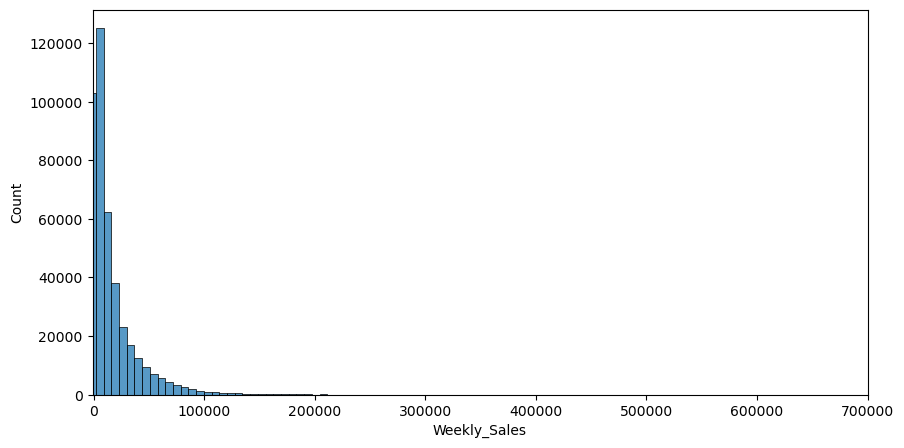

In [30]:
plt.figure(figsize=(10,5))
sn.histplot(full_df['Weekly_Sales'], bins=100)
plt.xlim(-1000, 700000)
plt.show

In [31]:
#los valores negativos corresponden al 0,3 % del DataSet, por lo que se elimina 
full_df = full_df[full_df["Weekly_Sales"] >= 0]

In [32]:
full_df["Weekly_Sales"].describe()

count    420285.000000
mean      16030.329773
std       22728.500149
min           0.000000
25%        2117.560000
50%        7659.090000
75%       20268.380000
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [33]:
#Se busca entender los outliers, y la distribución de los últimos cuartiles 
q99 = full_df["Weekly_Sales"].quantile(0.99)
q995 = full_df["Weekly_Sales"].quantile(0.995)
q999 = full_df["Weekly_Sales"].quantile(0.999)

q99, q995, q999

(np.float64(106565.43159999997),
 np.float64(130491.75000000004),
 np.float64(174912.91660000247))

In [34]:
(full_df["Weekly_Sales"] > 200000).sum()

np.int64(163)

In [35]:
(full_df["Weekly_Sales"] > 300000).sum()

np.int64(34)

In [36]:
(full_df["Weekly_Sales"] > 400000).sum()

np.int64(9)

In [37]:
(full_df["Weekly_Sales"] > 500000).sum()

np.int64(4)

In [38]:
(full_df["Weekly_Sales"] > 600000).sum()

np.int64(4)

In [41]:
full_df.sort_values("Weekly_Sales", ascending=False).head(20)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Holiday_BlackFriday,Holiday_Christmas,Holiday_Easter,Holiday_LaborDay,Holiday_None,Holiday_SuperBowl,Type_A,Type_B,Type_C
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.00,58563.24,...,BlackFriday,True,False,False,False,False,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.00,141630.61,...,BlackFriday,True,False,False,False,False,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,True,False,False
195088,20,72,2010-11-26,422306.25,True,46.66,3.039,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,True,False,False
264390,27,72,2010-11-26,420586.57,True,46.67,3.186,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,True,False,False
88428,10,7,2010-12-24,406988.63,False,57.06,3.236,0.00,0.00,0.00,...,None,False,False,False,False,True,False,False,True,False
95377,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.00,0.00,...,None,False,False,False,False,True,False,False,True,False
214432,22,72,2010-11-26,393705.20,True,44.61,3.070,0.00,0.00,0.00,...,BlackFriday,True,False,False,False,False,False,False,True,False


In [ ]:
# Se observa que los datos de ventas fuera de rango son reales. No pueden eliminarse, ni limitarse. 
#Esto podrín impedir que veamos el movimiento real del negocio en ciertas tiendas o temporadas. 
# se considera mejor una transformación logarítmica debido a la cola

In [42]:
# Transformación logarítmica
full_df["Weekly_Sales_log"] = np.log1p(full_df["Weekly_Sales"])

In [45]:
full_df["Weekly_Sales_log"]. describe()

count    420285.000000
mean          8.527055
std           2.023616
min           0.000000
25%           7.658492
50%           8.943779
75%           9.916867
max          13.448930
Name: Weekly_Sales_log, dtype: float64

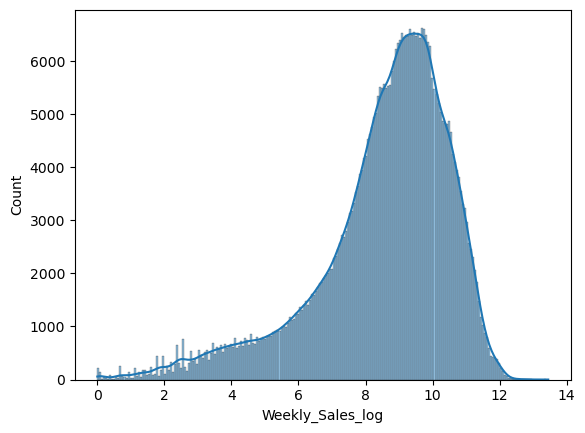

In [46]:
sn.histplot(full_df['Weekly_Sales_log'], kde=True)
plt.show()

In [ ]:
# la distribuci[on de los datos si mejora

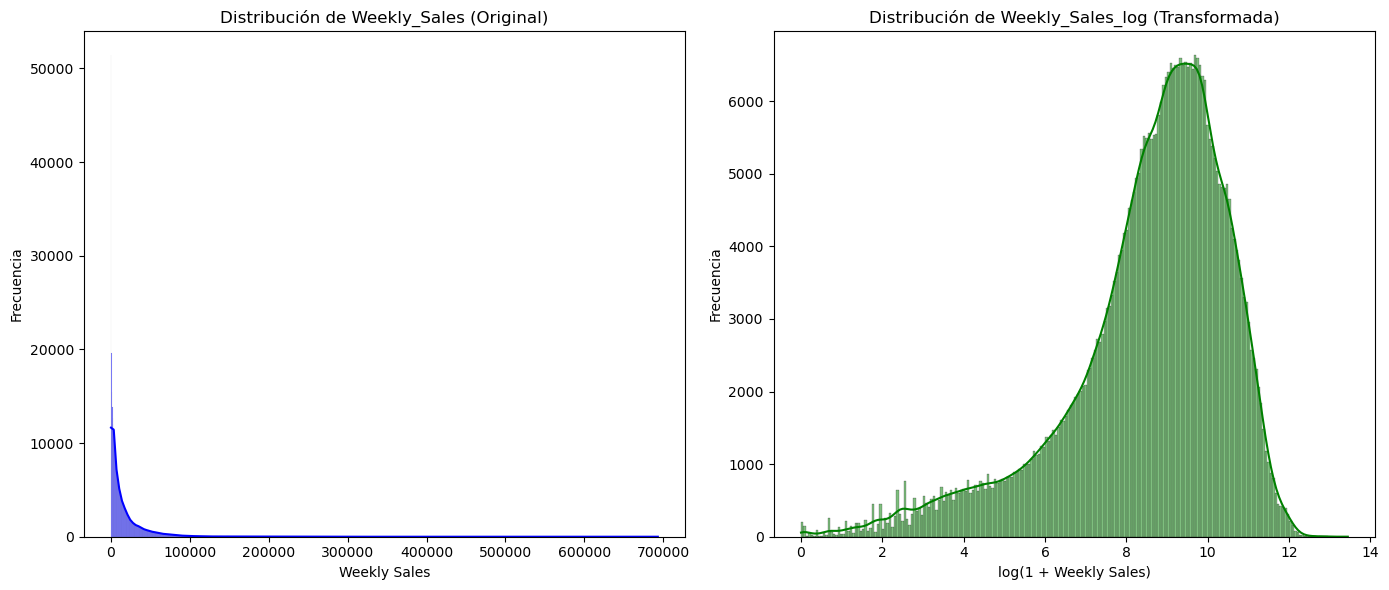

In [48]:
plt.figure(figsize=(14,6))

# Gráfico original
plt.subplot(1, 2, 1)
sn.histplot(full_df["Weekly_Sales"], kde=True, color="blue")
plt.title("Distribución de Weekly_Sales (Original)")
plt.xlabel("Weekly Sales")
plt.ylabel("Frecuencia")

# Gráfico transformado
plt.subplot(1, 2, 2)
sn.histplot(full_df["Weekly_Sales_log"], kde=True, color="green")
plt.title("Distribución de Weekly_Sales_log (Transformada)")
plt.xlabel("log(1 + Weekly Sales)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [51]:
skew_original = full_df["Weekly_Sales"].skew()
skew_log = full_df["Weekly_Sales_log"].skew()

print("Skew Weekly_Sales (original):", skew_original)
print("Skew Weekly_Sales_log (transformada):", skew_log)

Skew Weekly_Sales (original): 3.259108889879835
Skew Weekly_Sales_log (transformada): -1.2065444827516998


In [ ]:
# la transforamci[on logar[itmica reduce el sesgo, y modificó la escala sin perder los datos 

In [53]:
# Análisis de venta por tipo de tienda 
# Promedio de ventas por tipo
sales_by_type = full_df.groupby("Type")["Weekly_Sales"].mean().sort_values(ascending=False)
sales_by_type

Type
A    20145.109276
B    12288.133746
C     9547.430645
Name: Weekly_Sales, dtype: float64

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\447864369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=sales_by_type.index, y=sales_by_type.values, palette="viridis")


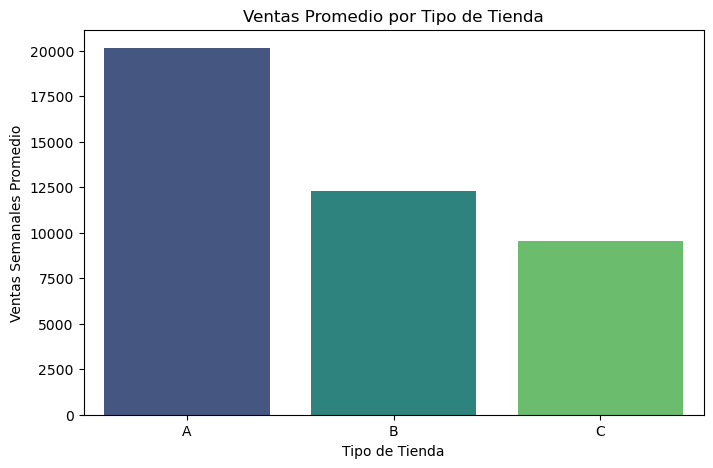

In [55]:
plt.figure(figsize=(8,5))
sn.barplot(x=sales_by_type.index, y=sales_by_type.values, palette="viridis")

plt.title("Ventas Promedio por Tipo de Tienda")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Ventas Semanales Promedio")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\3069218615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(data=full_df, x="Type", y="Weekly_Sales", palette="Set2")


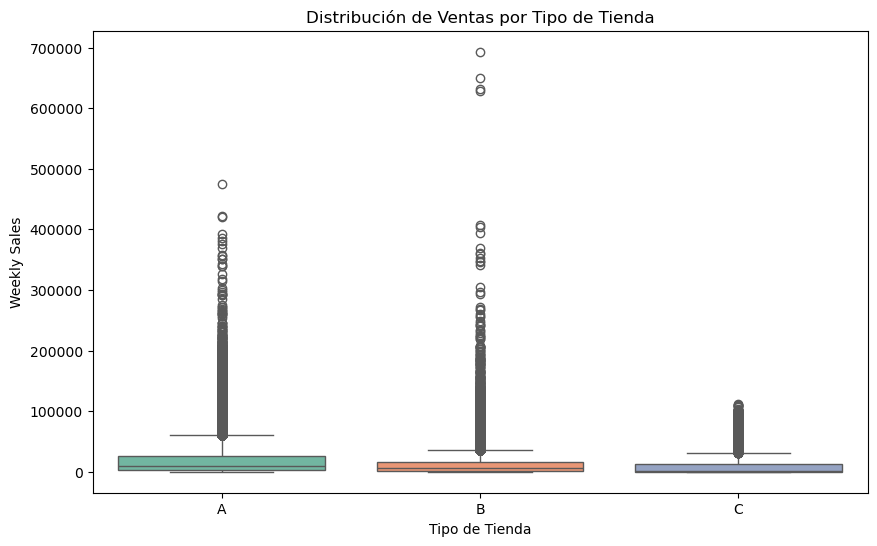

In [57]:
plt.figure(figsize=(10,6))
sn.boxplot(data=full_df, x="Type", y="Weekly_Sales", palette="Set2")

plt.title("Distribución de Ventas por Tipo de Tienda")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Weekly Sales")
plt.show()

In [58]:
full_df["Type"].value_counts()

Type
A    214993
B    162819
C     42473
Name: count, dtype: int64

In [60]:
#Impacto de días festivos 
holiday_mean = (
    full_df.groupby("IsHoliday")["Weekly_Sales"]
    .mean()
    .sort_values(ascending=False)
)

holiday_mean

IsHoliday
True     17092.566220
False    15949.958317
Name: Weekly_Sales, dtype: float64

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\2781824892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


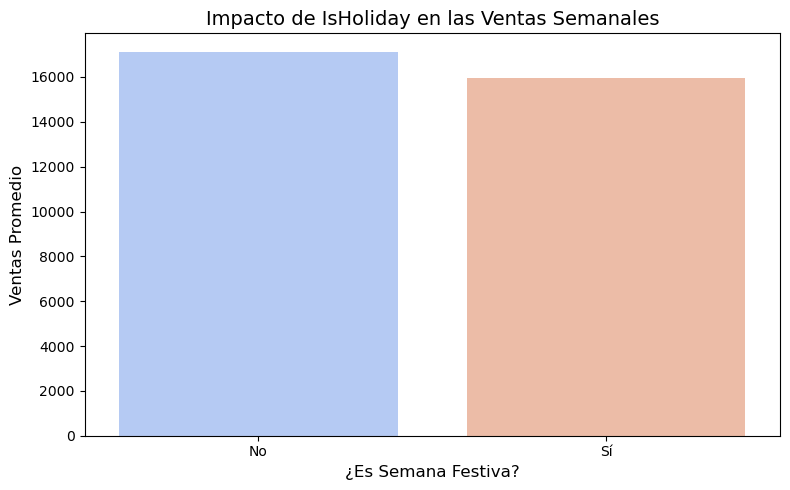

In [62]:
plt.figure(figsize=(8,5))
sn.barplot(
    x=holiday_mean.index.astype(str),
    y=holiday_mean.values,
    palette="coolwarm"
)

plt.title("Impacto de IsHoliday en las Ventas Semanales", fontsize=14)
plt.xlabel("¿Es Semana Festiva?", fontsize=12)
plt.ylabel("Ventas Promedio", fontsize=12)
plt.xticks([0,1], ["No", "Sí"])
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\703711645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(


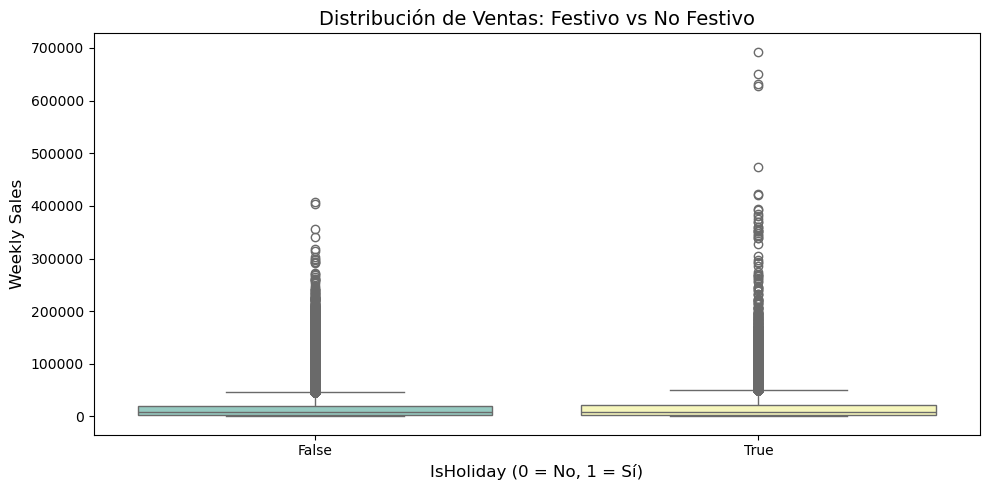

In [67]:
plt.figure(figsize=(10,5))
sn.boxplot(
    data=full_df,
    x="IsHoliday",
    y="Weekly_Sales",
    palette="Set3"
)
plt.title("Distribución de Ventas: Festivo vs No Festivo", fontsize=14)
plt.xlabel("IsHoliday (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.tight_layout()
plt.show()

In [63]:
#Ventas por festividad 
holiday_sales_mean = (
    full_df.groupby("Holiday_Type")["Weekly_Sales"]
    .mean()
    .sort_values(ascending=False)
)

holiday_sales_mean

Holiday_Type
BlackFriday    22269.601768
Easter         17208.332305
SuperBowl      16416.927383
LaborDay       15932.257230
None           15920.734424
Christmas      14632.663508
Name: Weekly_Sales, dtype: float64

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\3674940470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


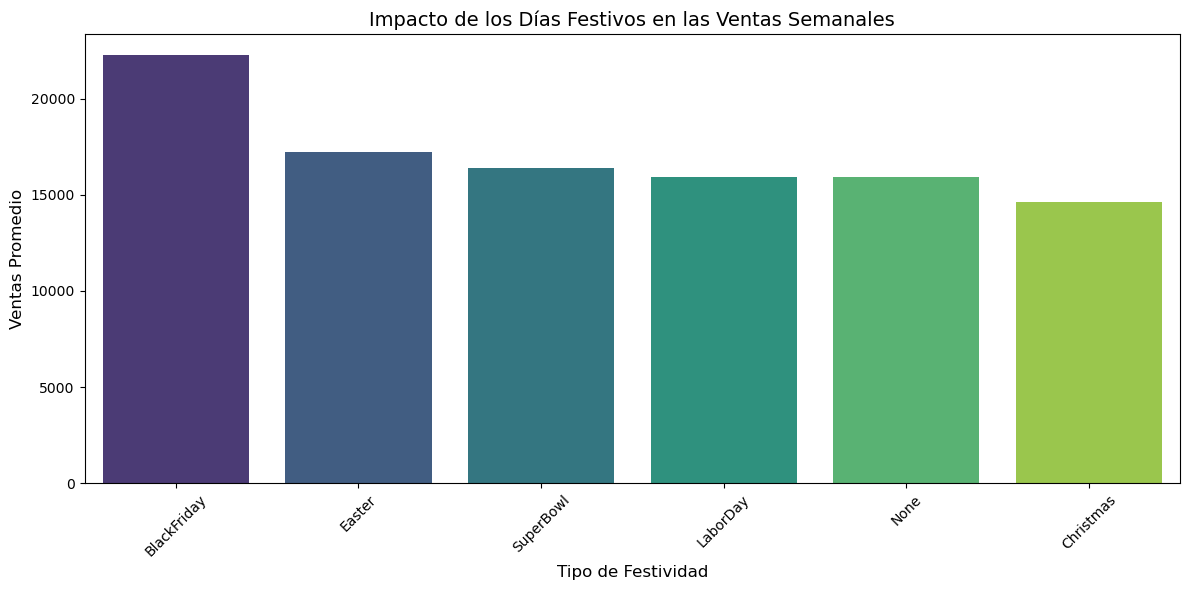

In [65]:
plt.figure(figsize=(12,6))
sn.barplot(
    x=holiday_sales_mean.index,
    y=holiday_sales_mean.values,
    palette="viridis"
)

plt.title("Impacto de los Días Festivos en las Ventas Semanales", fontsize=14)
plt.xlabel("Tipo de Festividad", fontsize=12)
plt.ylabel("Ventas Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_8360\3300013405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(


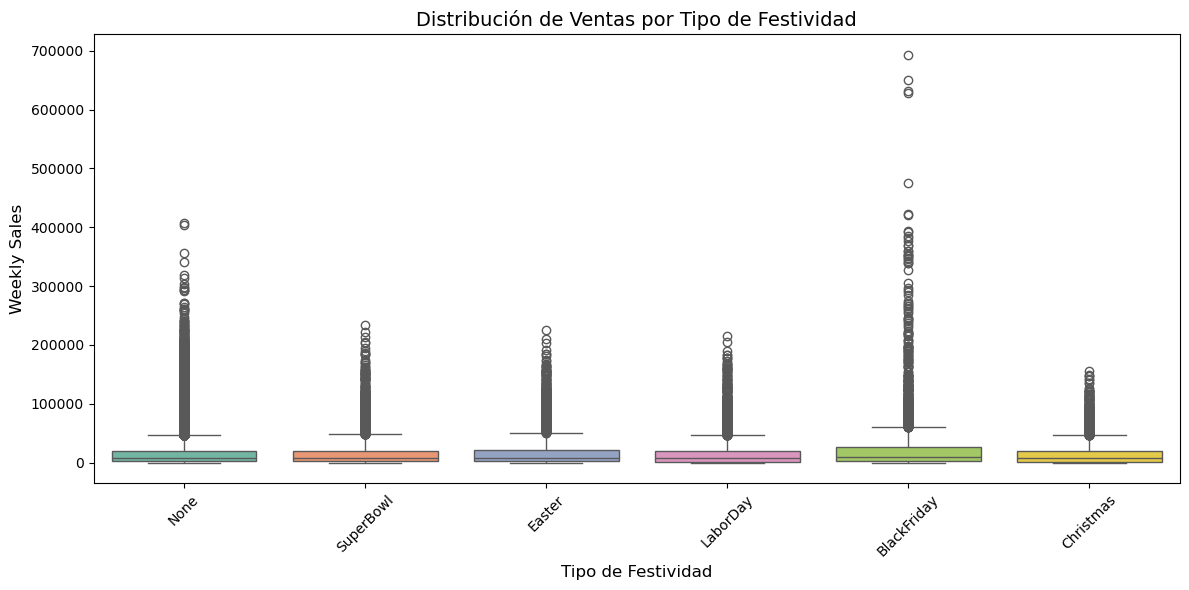

In [69]:
plt.figure(figsize=(12,6))
sn.boxplot(
    data=full_df,
    x="Holiday_Type",
    y="Weekly_Sales",
    palette="Set2"
)

plt.title("Distribución de Ventas por Tipo de Festividad", fontsize=14)
plt.xlabel("Tipo de Festividad", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# Comportamiento de MarkDown
((full_df['MarkDown2']<0).sum()/len(full_df))*100

np.float64(0.3097897855026946)

In [71]:
((full_df['MarkDown3']<0).sum()/len(full_df))*100

np.float64(0.06091104845521491)

In [72]:
# Filas con valores negativos en MarkDown2 o MarkDown3
#se eliminan, son pocas y pueden dañar los modelos futuros, no tienen sentido en la variable
mask_neg = (full_df["MarkDown2"] < 0) | (full_df["MarkDown3"] < 0)

# Opcional: ver cuántas son
full_df[mask_neg].shape

# Nos quedamos solo con las filas buenas
full_df = full_df[~mask_neg].copy()

In [73]:
full_df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Year,Month,Week,Day,DayOfYear,Quarter,Weekly_Sales_log
count,418727.000000,418727.000000,418727,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,...,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000
mean,22.197219,44.243708,2011-06-16 22:07:44.866129664,16025.870561,60.052229,3.359306,2575.810834,882.053540,470.401006,1080.084901,...,171.202124,7.961559,136684.815500,2010.964714,6.449066,25.823711,15.670869,180.801262,2.482907,8.526503
min,1.000000,1.000000,2010-02-05 00:00:00,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,...,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2116.195000,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,...,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.000000,8.000000,97.000000,2.000000,7.657847
50%,22.000000,37.000000,2011-06-17 00:00:00,7657.150000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,...,182.350989,7.866000,140167.000000,2011.000000,6.000000,26.000000,16.000000,181.000000,2.000000,8.943526
75%,33.000000,74.000000,2012-02-24 00:00:00,20265.010000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,...,212.412888,8.567000,202505.000000,2012.000000,9.000000,38.000000,23.000000,265.000000,3.000000,9.916700
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,...,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.000000,31.000000,365.000000,4.000000,13.448930
std,12.790503,30.508543,NaN,22725.312252,18.455276,0.458390,6056.727745,5085.673098,5543.813078,3901.557338,...,39.158832,1.864314,61010.367641,0.795955,3.246222,14.166038,8.751625,99.310718,1.072294,2.023900


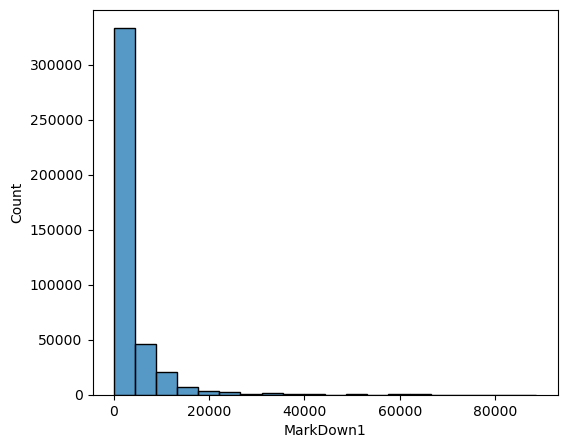

In [74]:
plt.figure(figsize=(6,5))
sn.histplot(full_df['MarkDown1'], bins=20)
plt.show()

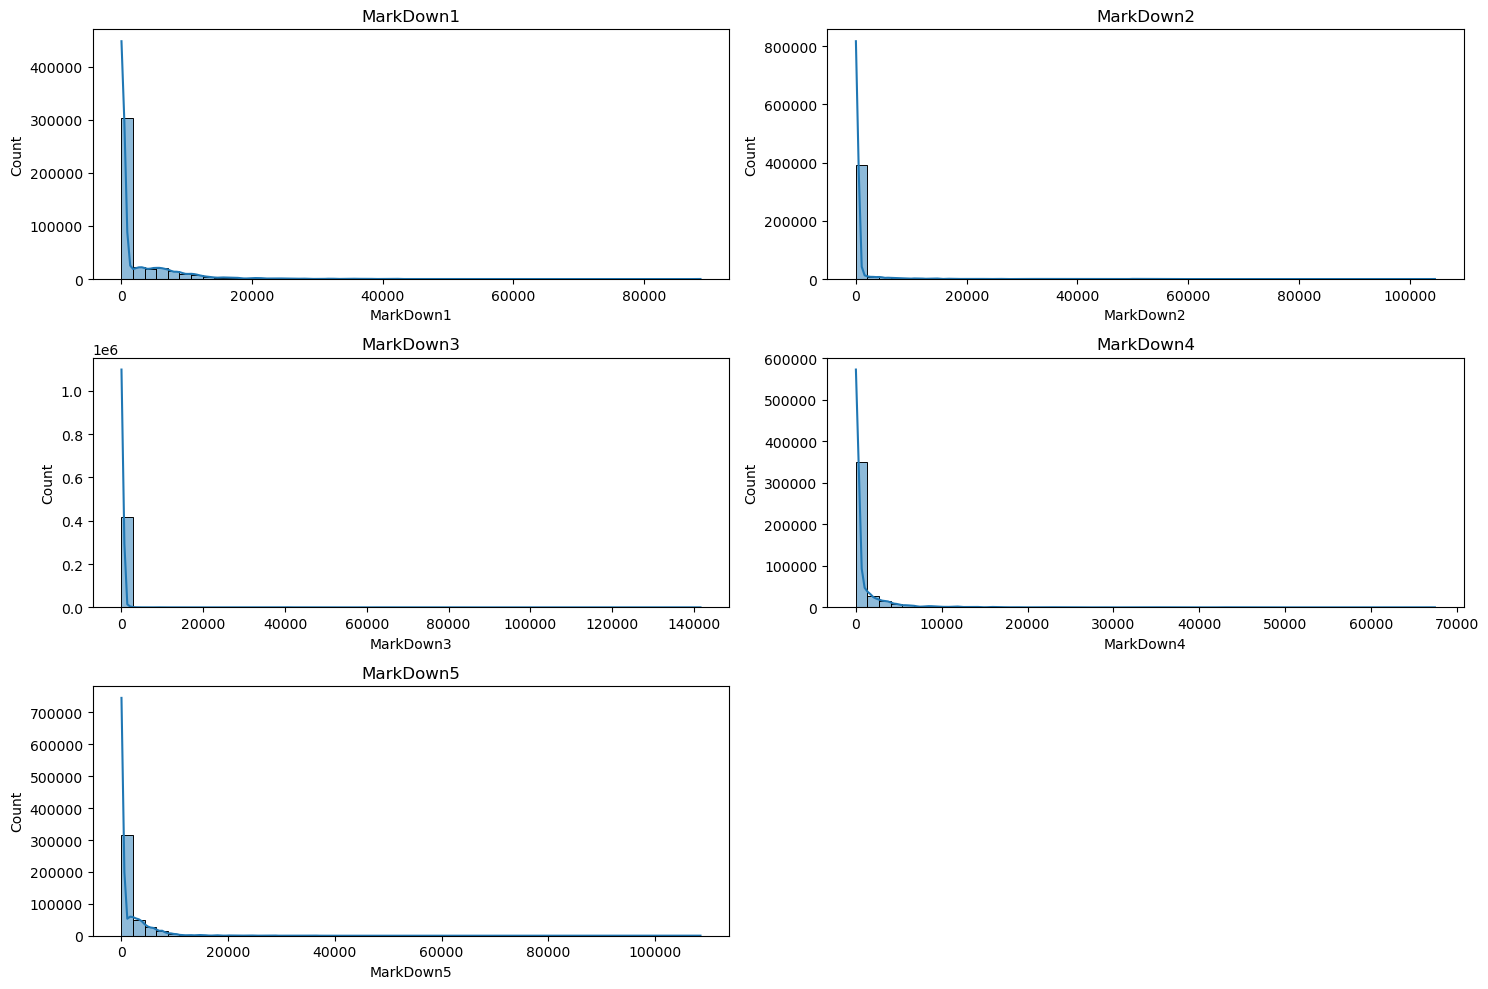

In [75]:
cols_md = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

plt.figure(figsize=(15,10))
for i, col in enumerate(cols_md):
    plt.subplot(3, 2, i+1)
    sn.histplot(full_df[col], kde=True, bins=50)
    plt.title(col)

plt.tight_layout()
plt.show()

In [76]:
full_df[cols_md].quantile([0.99, 0.995, 0.999])

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0.990,28177.29,21813.16,2100.01,16822.46,15590.53
0.995,37194.44,37454.29,41487.59,28199.34,23647.05
0.999,62172.73,72413.71,88805.58,48403.53,53212.72


In [77]:
for col in cols_md:
    print(col, (full_df[col] > 50000).sum())

MarkDown1 992
MarkDown2 1208
MarkDown3 1724
MarkDown4 357
MarkDown5 479


In [80]:
#hay muchas variables con valores altos, por lo que si se retiran pueden alterar la realidad de la tienda, es mejor hacer una transformación 

In [81]:
for col in cols_md:
    full_df[col + "_log"] = np.log1p(full_df[col])

In [82]:
def compare_original_vs_log(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Original
    sn.histplot(df[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} - Original Distribution")

    # Log-transformed
    sn.histplot(df[col + '_log'], bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f"{col} - Log(1+x) Distribution")
plt.show()

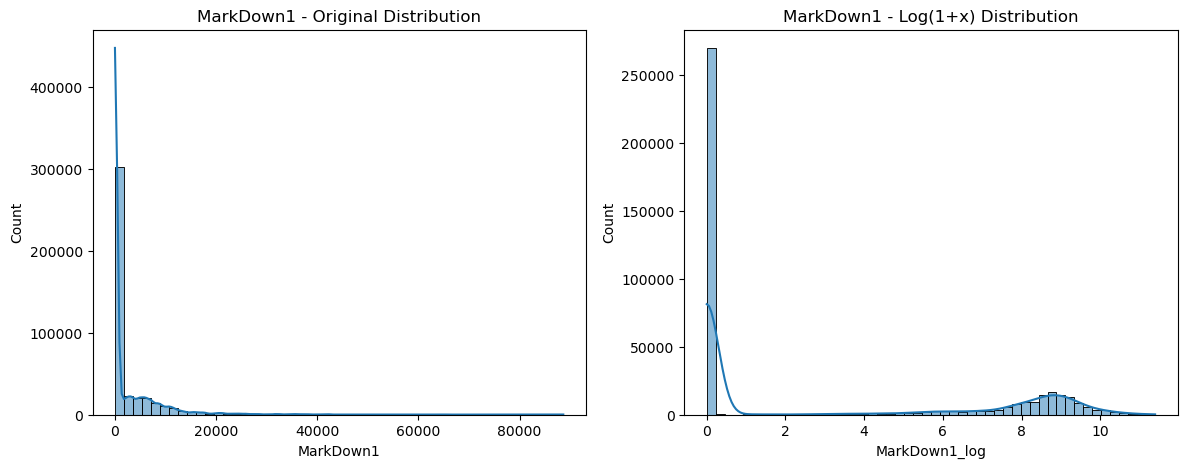

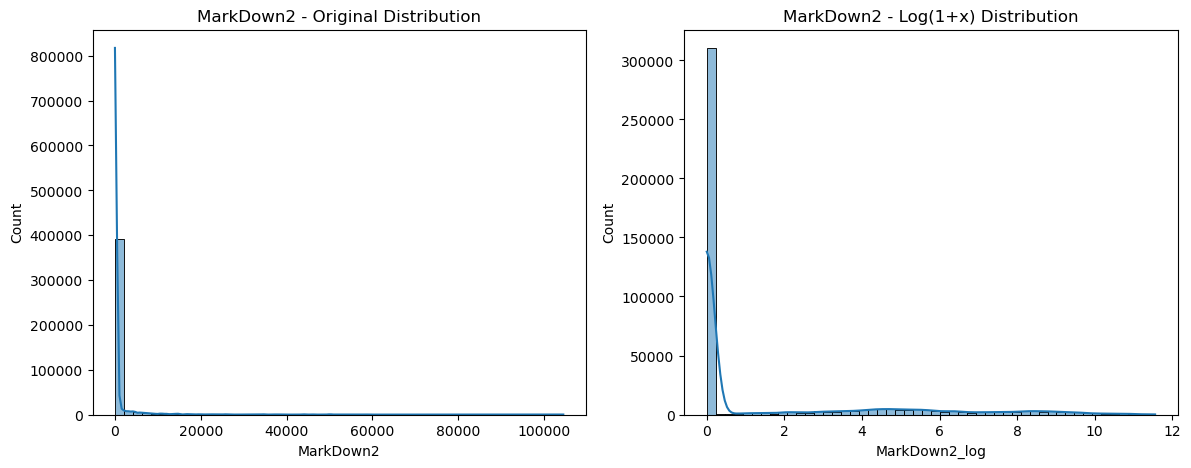

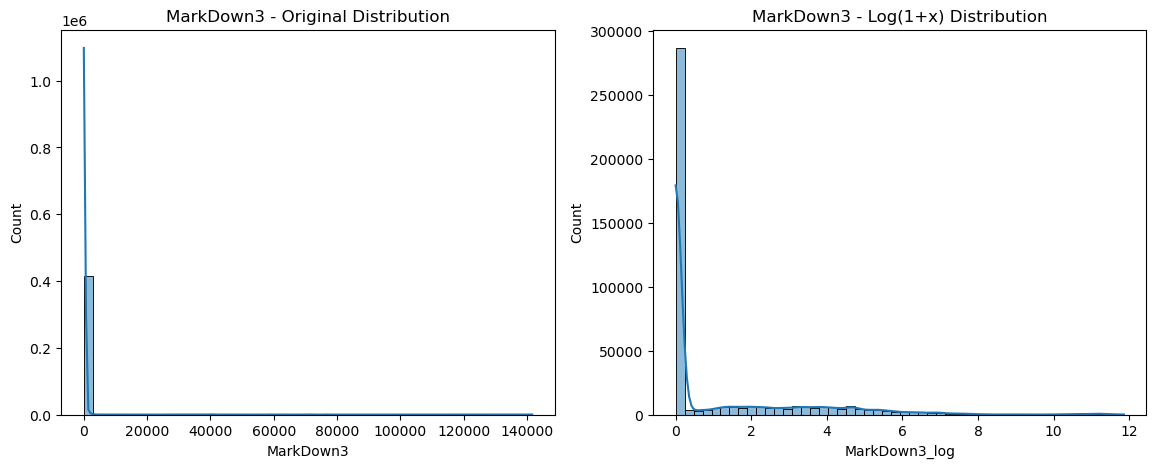

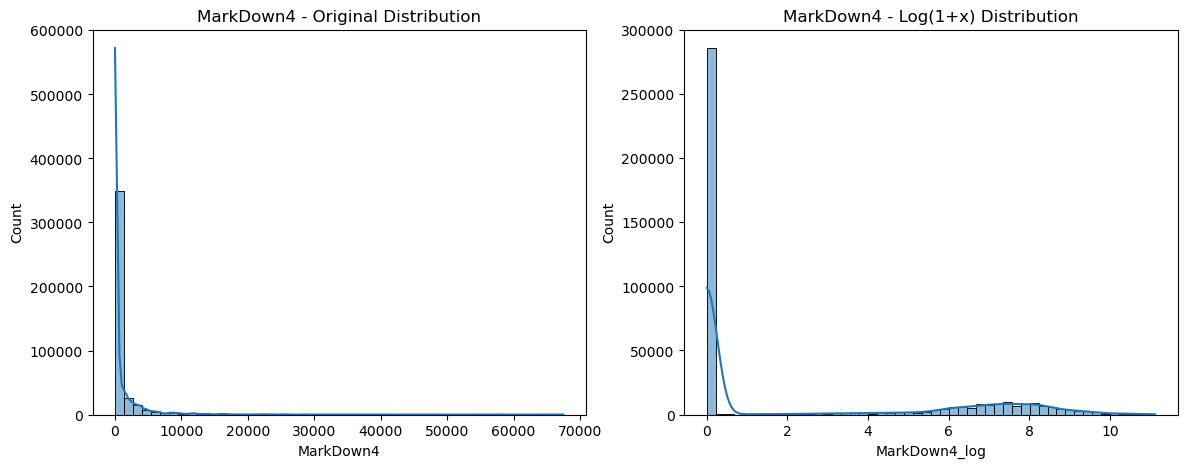

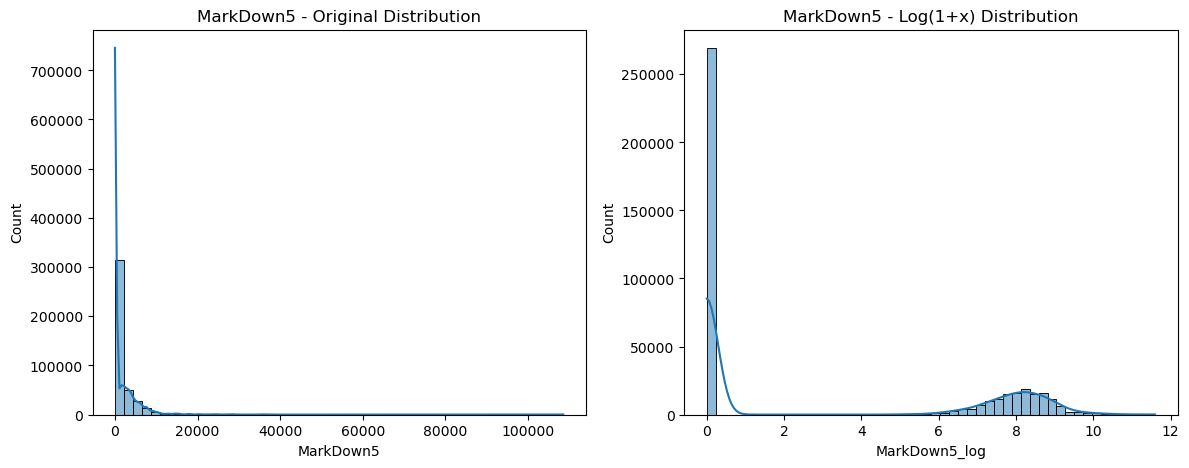

In [83]:
for col in cols_md:
    compare_original_vs_log(full_df, col)

In [85]:
# Lista de columnas originales y sus versiones transformadas
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
markdown_log_cols = [col + "_log" for col in markdown_cols]
# Crear un diccionario para almacenar resultados
corr_results = {}

# Calcular correlaciones originales y transformadas
for col in markdown_cols:
    corr_results[col] = full_df[col].corr(full_df["Weekly_Sales"])

for col in markdown_log_cols:
    corr_results[col] = full_df[col].corr(full_df["Weekly_Sales"])

# Convertir a DataFrame para visualizar mejor
corr_md_df = pd.DataFrame.from_dict(corr_results, orient="index", columns=["Correlation"])
corr_md_df.sort_values("Correlation", ascending=False)

,Correlation
MarkDown3_log,0.064164
MarkDown5,0.050299
MarkDown1,0.046978
MarkDown4_log,0.042690
MarkDown3,0.038622
MarkDown4,0.037475
MarkDown2_log,0.030468
MarkDown1_log,0.024697
MarkDown2,0.021037
MarkDown5_log,0.018774


In [86]:
# correlaciones variable numéricas

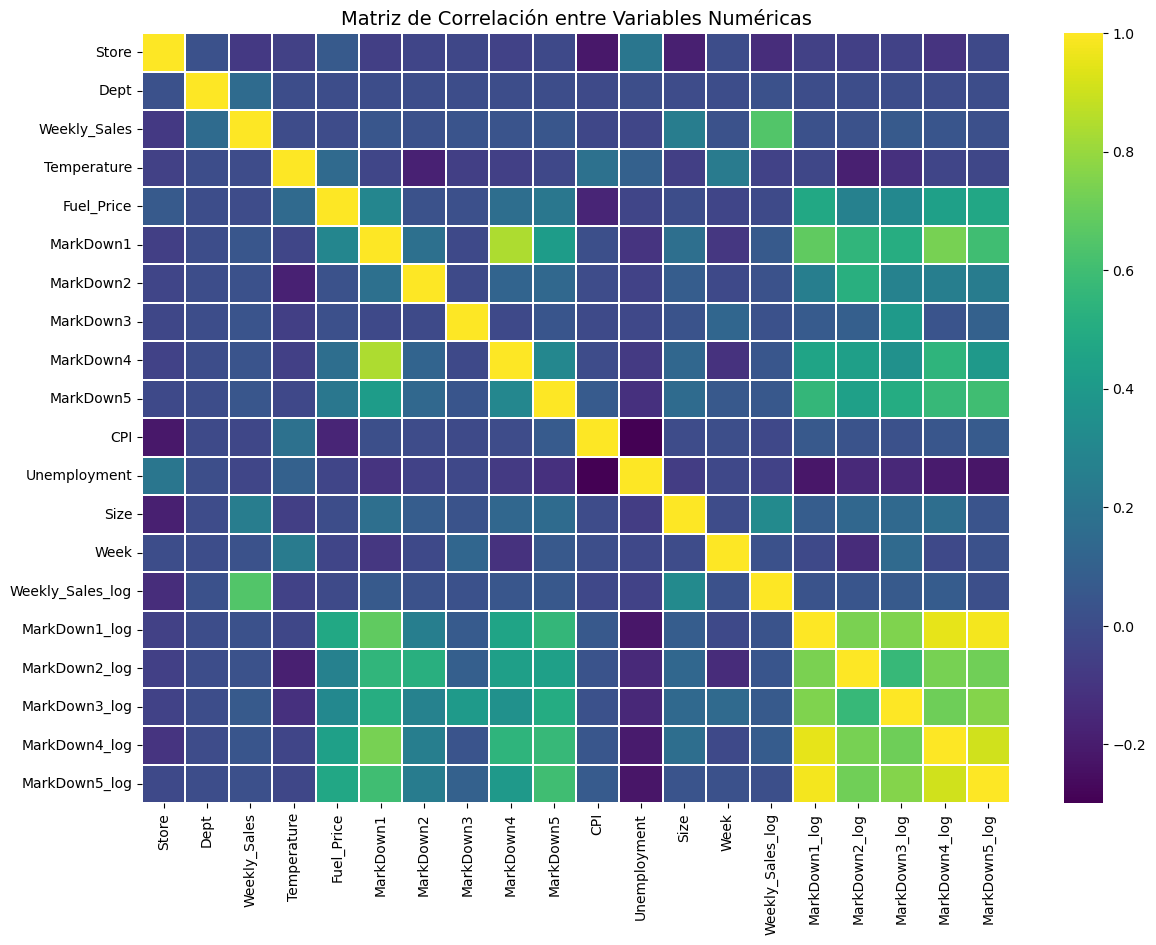

In [94]:
# Seleccionar solo columnas numéricas
numeric_df = full_df.select_dtypes(include=["int64", "float64"])
numeric_df.shape
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sn.heatmap(
    corr_matrix,
    cmap="viridis",
    linewidths=0.3,
    annot=False
)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.show()

In [95]:
# Ordenar de mayor a menor correlación absoluta
corr_target = corr_matrix["Weekly_Sales"].sort_values(ascending=False)

corr_target.to_frame().style.background_gradient(cmap="Blues")

,Weekly_Sales
Weekly_Sales,1.000000
Weekly_Sales_log,0.649420
Size,0.244210
Dept,0.148769
MarkDown3_log,0.064164
MarkDown5,0.050299
MarkDown1,0.046978
MarkDown4_log,0.042690
MarkDown3,0.038622
MarkDown4,0.037475


In [98]:
# Ordenar de mayor a menor correlación absoluta
corr_target = corr_matrix["Weekly_Sales_log"].sort_values(ascending=False)

corr_target.to_frame().style.background_gradient(cmap="Greens")


,Weekly_Sales_log
Weekly_Sales_log,1.000000
Weekly_Sales,0.649420
Size,0.318713
MarkDown4_log,0.072081
MarkDown1,0.064178
MarkDown3_log,0.063292
MarkDown5,0.055800
MarkDown4,0.047054
MarkDown2_log,0.045924
MarkDown1_log,0.032992


In [99]:
full_df['CPI'].describe()

count    418727.000000
mean        171.202124
std          39.158832
min         126.064000
25%         132.022667
50%         182.350989
75%         212.412888
max         227.232807
Name: CPI, dtype: float64

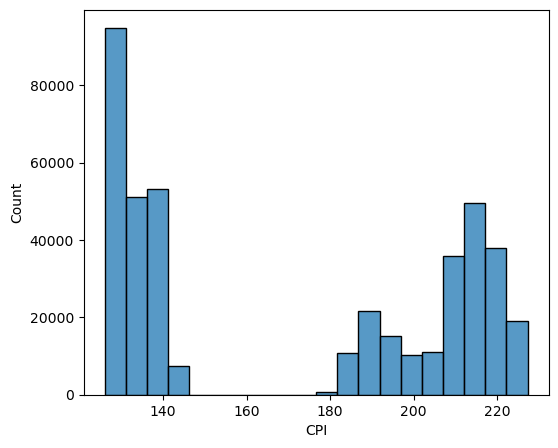

In [100]:
plt.figure(figsize=(6,5))
sn.histplot(full_df['CPI'], bins=20)
plt.show()

In [101]:
full_df["CPI"].isna().sum()

np.int64(0)

In [102]:
full_df['Unemployment'].describe()

count    418727.000000
mean          7.961559
std           1.864314
min           3.879000
25%           6.891000
50%           7.866000
75%           8.567000
max          14.313000
Name: Unemployment, dtype: float64

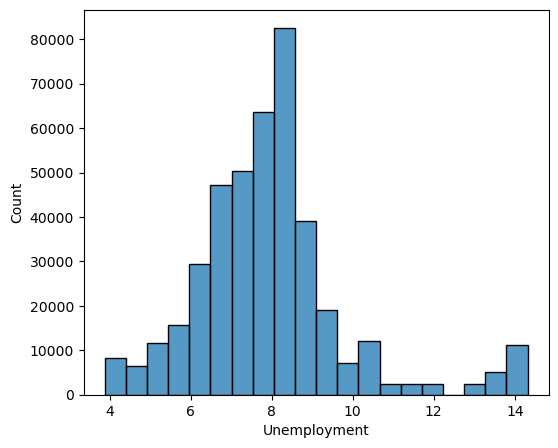

In [103]:
plt.figure(figsize=(6,5))
sn.histplot(full_df['Unemployment'], bins=20)
plt.show()

In [104]:
full_df["Unemployment"].isna().sum()

np.int64(0)

In [105]:
full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_SuperBowl,Type_A,Type_B,Type_C,Weekly_Sales_log,MarkDown1_log,MarkDown2_log,MarkDown3_log,MarkDown4_log,MarkDown5_log
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,False,True,False,False,10.123647,0.0,0.0,0.0,0.0,0.0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,True,True,False,False,10.737277,0.0,0.0,0.0,0.0,0.0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,False,True,False,False,10.635773,0.0,0.0,0.0,0.0,0.0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,False,True,False,False,9.873262,0.0,0.0,0.0,0.0,0.0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,False,True,False,False,9.990990,0.0,0.0,0.0,0.0,0.0


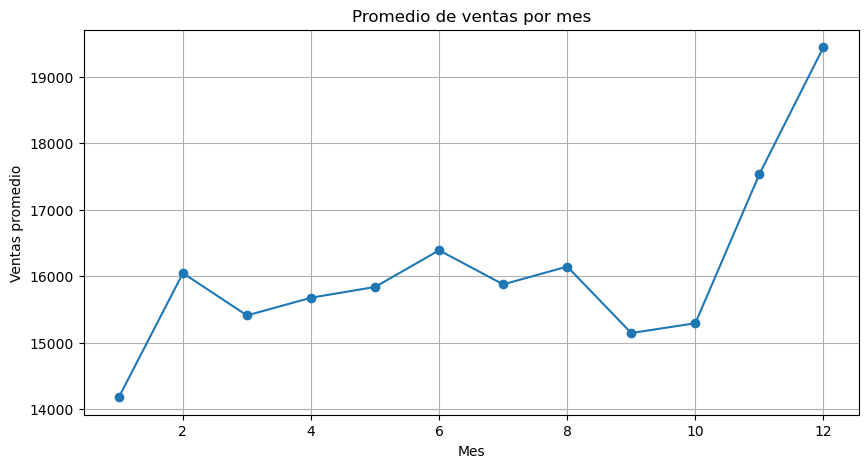

In [111]:
#ESTACIONAIDAD POR MES

monthly_sales = full_df.groupby("Month")["Weekly_Sales"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Promedio de ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas promedio")
plt.grid(True)
plt.show()

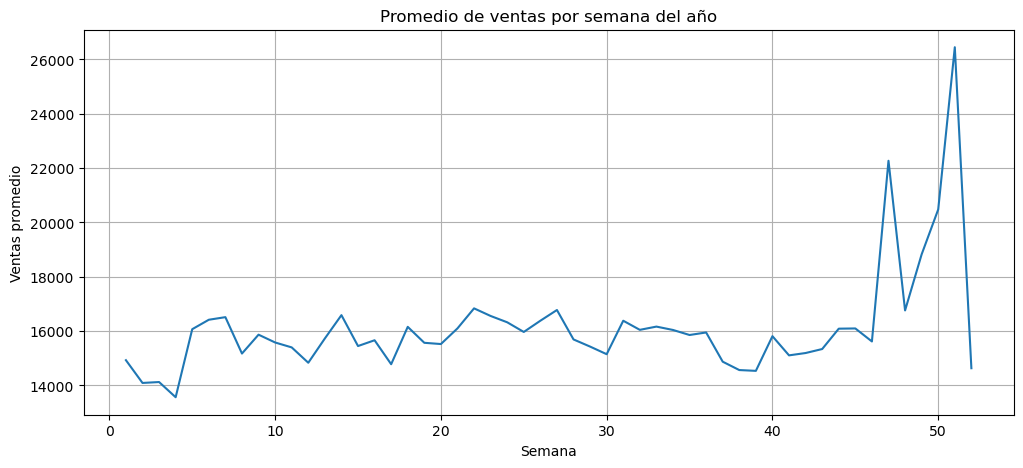

In [112]:
#estacionalidad por semana 
weekly_sales = full_df.groupby("Week")["Weekly_Sales"].mean()

plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker="")
plt.title("Promedio de ventas por semana del año")
plt.xlabel("Semana")
plt.ylabel("Ventas promedio")
plt.grid(True)
plt.show()

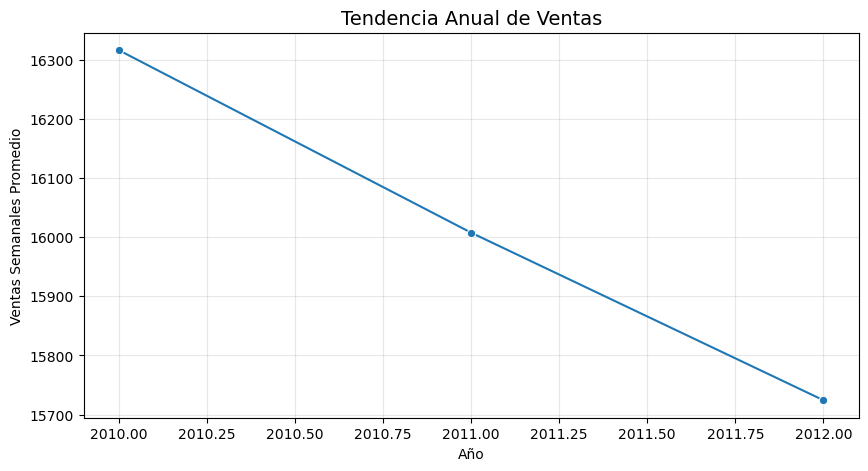

In [114]:
# Asegurar columna Year (por si aún no existe)
full_df["Year"] = full_df["Date"].dt.year

sales_by_year = full_df.groupby("Year")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(10,5))
sn.lineplot(data=sales_by_year, x="Year", y="Weekly_Sales", marker="o")
plt.title("Tendencia Anual de Ventas", fontsize=14)
plt.ylabel("Ventas Semanales Promedio")
plt.xlabel("Año")
plt.grid(alpha=0.3)
plt.show()

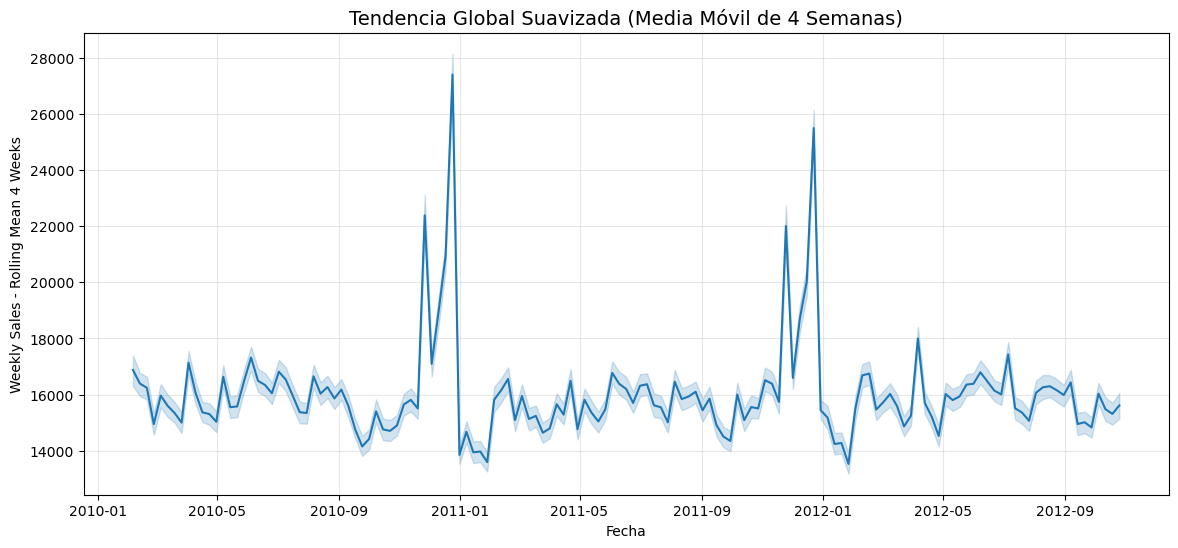

In [118]:
full_df_sorted = full_df.sort_values("Date")
full_df_sorted["Rolling_4w"] = full_df_sorted["Weekly_Sales"].rolling(window=4).mean()

plt.figure(figsize=(14,6))
sn.lineplot(data=full_df_sorted, x="Date", y="Rolling_4w")
plt.title("Tendencia Global Suavizada (Media Móvil de 4 Semanas)", fontsize=14)
plt.ylabel("Weekly Sales - Rolling Mean 4 Weeks")
plt.xlabel("Fecha")
plt.grid(alpha=0.3)
plt.show()

### Conslusiones

1. La temporalidad resultará importante en el modelo (Random Forest R, XGBoost)
2. Estacionalidad fuerte, dada por los Holidays determinados, especialmente BlackFriday.
3. El tipo de tienda es una buena variable explicativa, debería analizarse la ubicación, tamaño o inventario.
4. MarkDown (algunas variables), están relacionadas, pero marcan baja correlación, se podría mantener las más altas.
5. Las variables con mayor correlación son: size, dept.
6. Al parecer las ventas dependen en su mayoría al tipo de tienda y las festividades. 

In [119]:
#Sanity check 
print("Dimensiones:", full_df.shape)
print("\nValores nulos:\n", full_df.isna().sum())
print("\nDuplicados:", full_df.duplicated().sum())

full_df.describe()

Dimensiones: (418727, 41)

Valores nulos:
 Store                  0
Dept                   0
Date                   0
Weekly_Sales           0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1              0
MarkDown2              0
MarkDown3              0
MarkDown4              0
MarkDown5              0
CPI                    0
Unemployment           0
Type                   0
Size                   0
Year                   0
Month                  0
Week                   0
Day                    0
DayOfYear              0
Quarter                0
IsMonthEnd             0
IsMonthStart           0
Holiday_Type           0
Holiday_BlackFriday    0
Holiday_Christmas      0
Holiday_Easter         0
Holiday_LaborDay       0
Holiday_None           0
Holiday_SuperBowl      0
Type_A                 0
Type_B                 0
Type_C                 0
Weekly_Sales_log       0
MarkDown1_log          0
MarkDown2_log          0
MarkDown3_log          0
MarkDow

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Week,Day,DayOfYear,Quarter,Weekly_Sales_log,MarkDown1_log,MarkDown2_log,MarkDown3_log,MarkDown4_log,MarkDown5_log
count,418727.000000,418727.000000,418727,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,...,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000,418727.000000
mean,22.197219,44.243708,2011-06-16 22:07:44.866129664,16025.870561,60.052229,3.359306,2575.810834,882.053540,470.401006,1080.084901,...,25.823711,15.670869,180.801262,2.482907,8.526503,2.901133,1.451564,1.110632,2.235610,2.877336
min,1.000000,1.000000,2010-02-05 00:00:00,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2116.195000,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,...,14.000000,8.000000,97.000000,2.000000,7.657847,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7657.150000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,...,26.000000,16.000000,181.000000,2.000000,8.943526,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20265.010000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,...,38.000000,23.000000,265.000000,3.000000,9.916700,7.921136,1.289233,1.678964,6.031550,7.672265
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,...,52.000000,31.000000,365.000000,4.000000,13.448930,11.392426,11.557139,11.860985,11.119525,11.594692
std,12.790503,30.508543,NaN,22725.312252,18.455276,0.458390,6056.727745,5085.673098,5543.813078,3901.557338,...,14.166038,8.751625,99.310718,1.072294,2.023900,4.019141,2.764514,2.011538,3.423390,3.897390


In [120]:
numeric_df = full_df.select_dtypes(include=['int64','float64'])
numeric_df.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Weekly_Sales_log,MarkDown1_log,MarkDown2_log,MarkDown3_log,MarkDown4_log,MarkDown5_log
0,1,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,10.123647,0.0,0.0,0.0,0.0,0.0
1,1,1,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,6,10.737277,0.0,0.0,0.0,0.0,0.0
2,1,1,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,7,10.635773,0.0,0.0,0.0,0.0,0.0
3,1,1,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,8,9.873262,0.0,0.0,0.0,0.0,0.0
4,1,1,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,9,9.990990,0.0,0.0,0.0,0.0,0.0


## Sección 5. Resumen del Proyecto

Este proyecto realiza un proceso completo de limpieza, integración y análisis exploratorio del dataset histórico de ventas de Walmart, con el objetivo de dejar una base de datos lista para análisis de negocio y futuros modelos predictivos.

Se integraron tres fuentes (ventas, características por tienda y características semanales) en un dataset consolidado, corrigiendo tipos de datos, eliminando duplicados, manejando valores nulos —especialmente en MarkDowns— y asegurando su calidad estructural.

Se generaron variables temporales (año, mes, semana, cuartil, fin de año) y una categorización especial de festivos (Holiday_Type) para capturar eventos como Black Friday, Thanksgiving, Easter y Super Bowl. Las variables categóricas se transformaron mediante One-Hot Encoding, conservando las columnas originales para análisis.

 **Se observo:**
 - Tendencia anual ligeramente decreciente en las ventas.
 - Estacionalidad marcada con picos claros en Black Friday y otras fechas festivas.
 - Las tiendas tipo A mantienen mayores ventas.
 - Weekly_Sales presenta fuerte sesgo, mitigado parcialmente con log-transformación.
 - Los MarkDowns y factores económicos muestran baja correlación, mientras que el tamaño de tienda (Size) y algunas variables temporales aportan más señal.

**Conclusión Final**
El trabajo deja un dataset limpio, enriquecido y documentado, adecuado para análisis posteriores o construcción de modelos. Este proyecto demuestra habilidades en data cleaning, feature engineering, análisis temporal y exploración de datos, fundamentales para roles de Data Cleaning y Data Analysis.

In [122]:
# Guardar dataset final limpio (con columnas originales + nuevas features + dummies)
full_df.to_csv("walmart_cleaned.csv", index=False)

print("Archivo 'walmart_cleaned.csv' generado correctamente.")

Archivo 'walmart_cleaned.csv' generado correctamente.
